In [6]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree        import DecisionTreeClassifier
from sklearn.ensemble    import RandomForestClassifier
from sklearn.svm         import SVC 

In [116]:
data = pd.read_csv('dataset_halfSecondWindow.csv')
data.head(3)

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12


In [195]:
col_names = [ 'activityrecognition#1',  'android.sensor.accelerometer#mean',  'android.sensor.game_rotation_vector#mean', 'android.sensor.gravity#mean',   'android.sensor.gyroscope#mean',   'android.sensor.gyroscope_uncalibrated#mean',  'android.sensor.light#mean',  'android.sensor.linear_acceleration#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.magnetic_field_uncalibrated#mean', 'android.sensor.orientation#mean', 'android.sensor.pressure#mean',  'android.sensor.proximity#mean', 'android.sensor.rotation_vector#mean', 'android.sensor.step_counter#mean', 'sound#mean',  'speed#mean', 'target', 'user', 'android.sensor.magnetic_field#mean']
columns_nine_features  = ['android.sensor.accelerometer#mean',  'sound#mean', 'android.sensor.orientation#mean', 'android.sensor.linear_acceleration#mean', 'speed#mean', 'android.sensor.gyroscope#mean', 'android.sensor.rotation_vector#mean', 'android.sensor.game_rotation_vector#mean',  'android.sensor.gyroscope_uncalibrated#mean', 'target', 'android.sensor.magnetic_field#mean', 'android.sensor.magnetic_field#mean']  
col_names_thirteen = [ 'android.sensor.accelerometer#mean',

  	'android.sensor.magnetic_field#mean',

      
          'android.sensor.orientation#mean', 

          'android.sensor.gravity#mean', 

          'android.sensor.linear_acceleration#mean',

          'android.sensor.gyroscope#mean', 

          'android.sensor.rotation_vector#mean',
      
          'android.sensor.gyroscope_uncalibrated#mean',
   
          'android.sensor.game_rotation_vector#mean',
  
         	'android.sensor.magnetic_field_uncalibrated#mean',
     
          'sound#mean', 

          'android.sensor.light#mean', 
    
          'speed#mean', 
          'target'
          ]


In [196]:
df = data[col_names_thirteen]
# df.head(4)
# missing = df.isna().sum()
# missing.to_csv('missing_values.csv')
df.shape

(62585, 14)

In [197]:
df['target'].value_counts()

Car        12518
Bus        12517
Train      12517
Walking    12517
Still      12516
Name: target, dtype: int64

In [200]:
df_dropna = df.dropna()
df_dropna.shape

(18586, 14)

In [201]:
df_dropna['target'].value_counts()

Car        5134
Bus        4962
Walking    4734
Still      3331
Train       425
Name: target, dtype: int64

In [217]:

df_Walking     = df_dropna[df_dropna['target'] == 'Walking']
df_Train       = df_dropna[df_dropna['target'] == 'Train']
df_Car         = df_dropna[df_dropna['target'] == 'Car']
df_Bus         = df_dropna[df_dropna['target'] == 'Bus']
df_Still       = df_dropna[df_dropna['target'] == 'Still']



accelerometer_Walking  = round(  df_Walking['android.sensor.accelerometer#mean'].mean(), 1  )
accelerometer_Train    = round(  df_Train['android.sensor.accelerometer#mean'].mean(), 1  )
accelerometer_Car      = round(  df_Car['android.sensor.accelerometer#mean'].mean(), 1  )
accelerometer_Bus      = round(  df_Bus['android.sensor.accelerometer#mean'].mean(), 1  )
accelerometer_Still    = round(  df_Still['android.sensor.accelerometer#mean'].mean(), 1  )


magnetic_field_Walking  = round(  df_Walking['android.sensor.magnetic_field#mean'].mean(), 1  )
magnetic_field_Train    = round(  df_Train['android.sensor.magnetic_field#mean'].mean(), 1  )
magnetic_field_Car      = round(  df_Car['android.sensor.magnetic_field#mean'].mean(), 1  )
magnetic_field_Bus      = round(  df_Bus['android.sensor.magnetic_field#mean'].mean(), 1  )
magnetic_field_Still    = round(  df_Still['android.sensor.magnetic_field#mean'].mean(), 1  )


orientation_Walking  = round(  df_Walking['android.sensor.orientation#mean'].mean(), 1  )
orientation_Train    = round(  df_Train['android.sensor.orientation#mean'].mean(), 1  )
orientation_Car      = round(  df_Car['android.sensor.orientation#mean'].mean(), 1  )
orientation_Bus      = round(  df_Bus['android.sensor.orientation#mean'].mean(), 1  )
orientation_Still    = round(  df_Still['android.sensor.orientation#mean'].mean(), 1  )


gravity_Walking  = round(  df_Walking['android.sensor.gravity#mean'].mean(), 1  )
gravity_Train    = round(  df_Train['android.sensor.gravity#mean'].mean(), 1  )
gravity_Car      = round(  df_Car['android.sensor.gravity#mean'].mean(), 1  )
gravity_Bus      = round(  df_Bus['android.sensor.gravity#mean'].mean(), 1  )
gravity_Still    = round(  df_Still['android.sensor.gravity#mean'].mean(), 1  )


linear_acceleration_Walking  = round(  df_Walking['android.sensor.linear_acceleration#mean'].mean(), 1  )
linear_acceleration_Train    = round(  df_Train['android.sensor.linear_acceleration#mean'].mean(), 1  )
linear_acceleration_Car      = round(  df_Car['android.sensor.linear_acceleration#mean'].mean(), 1  )
linear_acceleration_Bus      = round(  df_Bus['android.sensor.linear_acceleration#mean'].mean(), 1  )
linear_acceleration_Still    = round(  df_Still['android.sensor.linear_acceleration#mean'].mean(), 1  )


gyroscope_Walking  = round(  df_Walking['android.sensor.gyroscope#mean'].mean(), 1  )
gyroscope_Train    = round(  df_Train['android.sensor.gyroscope#mean'].mean(), 1  )
gyroscope_Car      = round(  df_Car['android.sensor.gyroscope#mean'].mean(), 1  )
gyroscope_Bus      = round(  df_Bus['android.sensor.gyroscope#mean'].mean(), 1  )
gyroscope_Still    = round(  df_Still['android.sensor.gyroscope#mean'].mean(), 1  )


rotation_vector_Walking  = round(  df_Walking['android.sensor.rotation_vector#mean'].mean(), 1  )
rotation_vector_Train    = round(  df_Train['android.sensor.rotation_vector#mean'].mean(), 1  )
rotation_vector_Car      = round(  df_Car['android.sensor.rotation_vector#mean'].mean(), 1  )
rotation_vector_Bus      = round(  df_Bus['android.sensor.rotation_vector#mean'].mean(), 1  )
rotation_vector_Still    = round(  df_Still['android.sensor.rotation_vector#mean'].mean(), 1  )


gyroscope_uncalibrated_Walking  = round(  df_Walking['android.sensor.gyroscope_uncalibrated#mean'].mean(), 1  )
gyroscope_uncalibrated_Train    = round(  df_Train['android.sensor.gyroscope_uncalibrated#mean'].mean(), 1  )
gyroscope_uncalibrated_Car      = round(  df_Car['android.sensor.gyroscope_uncalibrated#mean'].mean(), 1  )
gyroscope_uncalibrated_Bus      = round(  df_Bus['android.sensor.gyroscope_uncalibrated#mean'].mean(), 1  )
gyroscope_uncalibrated_Still    = round(  df_Still['android.sensor.gyroscope_uncalibrated#mean'].mean(), 1  )


game_rotation_vector_Walking  = round(  df_Walking['android.sensor.game_rotation_vector#mean'].mean(), 1  )
game_rotation_vector_Train    = round(  df_Train['android.sensor.game_rotation_vector#mean'].mean(), 1  )
game_rotation_vector_Car      = round(  df_Car['android.sensor.game_rotation_vector#mean'].mean(), 1  )
game_rotation_vector_Bus      = round(  df_Bus['android.sensor.game_rotation_vector#mean'].mean(), 1  )
game_rotation_vector_Still    = round(  df_Still['android.sensor.game_rotation_vector#mean'].mean(), 1  )


magnetic_field_uncalibrated_Walking  = round(  df_Walking['android.sensor.magnetic_field_uncalibrated#mean'].mean(), 1  )
magnetic_field_uncalibrated_Train    = round(  df_Train['android.sensor.magnetic_field_uncalibrated#mean'].mean(), 1  )
magnetic_field_uncalibrated_Car      = round(  df_Car['android.sensor.magnetic_field_uncalibrated#mean'].mean(), 1  )
magnetic_field_uncalibrated_Bus      = round(  df_Bus['android.sensor.magnetic_field_uncalibrated#mean'].mean(), 1  )
magnetic_field_uncalibrated_Still    = round(  df_Still['android.sensor.magnetic_field_uncalibrated#mean'].mean(), 1  )


sound_Walking  = round(  df_Walking['sound#mean'].mean(), 1  )
sound_Train    = round(  df_Train['sound#mean'].mean(), 1  )
sound_Car      = round(  df_Car['sound#mean'].mean(), 1  )
sound_Bus      = round(  df_Bus['sound#mean'].mean(), 1  )
sound_Still    = round(  df_Still['sound#mean'].mean(), 1  )


light_Walking  = round(  df_Walking['android.sensor.light#mean'].mean(), 1  )
light_Train    = round(  df_Train['android.sensor.light#mean'].mean(), 1  )
light_Car      = round(  df_Car['android.sensor.light#mean'].mean(), 1  )
light_Bus      = round(  df_Bus['android.sensor.light#mean'].mean(), 1  )
light_Still    = round(  df_Still['android.sensor.light#mean'].mean(), 1  )


speed_Walking  = round(  df_Walking['speed#mean'].mean(), 1  )
speed_Train    = round(  df_Train['speed#mean'].mean(), 1  )
speed_Car      = round(  df_Car['speed#mean'].mean(), 1  )
speed_Bus      = round(  df_Bus['speed#mean'].mean(), 1  )
speed_Still    = round(  df_Still['speed#mean'].mean(), 1  )


index_colums = ['Walking', 'Train', 'Car', 'Bus', 'Still']

comparision = pd.DataFrame( 
     { 
          'Accelerometer'                : [accelerometer_Walking,                   accelerometer_Train,               accelerometer_Car,                 accelerometer_Bus,                 accelerometer_Still],
          'Magnetic Field'               : [magnetic_field_Walking,                  magnetic_field_Train,              magnetic_field_Car,                magnetic_field_Bus,                magnetic_field_Still],
          'Orientation'                  : [orientation_Walking,                     orientation_Train,                 orientation_Car,                   orientation_Bus,                   orientation_Still],
          'Gravity'                      : [gravity_Walking,                         gravity_Train,                     gravity_Car,                       gravity_Bus,                       gravity_Still],
          'Linear Acceleration'          : [linear_acceleration_Walking,             linear_acceleration_Train,         linear_acceleration_Car,           linear_acceleration_Bus,           linear_acceleration_Still],
          'Gyroscope'                    : [gyroscope_Walking,                       gyroscope_Train,                   gyroscope_Car,                     gyroscope_Bus,                     gyroscope_Still],
          'Rotation Vector'              : [rotation_vector_Walking,                 rotation_vector_Train,             rotation_vector_Car,               rotation_vector_Bus,               rotation_vector_Still],
          'Gyroscope Uncalibrated'       : [gyroscope_uncalibrated_Walking,          gyroscope_uncalibrated_Train,      gyroscope_uncalibrated_Car,        gyroscope_uncalibrated_Bus,        gyroscope_uncalibrated_Still],
          'Game Rotation Vector'         : [game_rotation_vector_Walking,            game_rotation_vector_Train,        game_rotation_vector_Car,          game_rotation_vector_Bus,          game_rotation_vector_Still],
          'Magnetic Field Uncalibrated'  : [magnetic_field_uncalibrated_Walking,     magnetic_field_uncalibrated_Train, magnetic_field_uncalibrated_Car,   magnetic_field_uncalibrated_Bus,   magnetic_field_uncalibrated_Still],
          'Sound'                        : [sound_Walking,                           sound_Train,                       sound_Car,                         sound_Bus,                         sound_Still],     
          'Light'                        : [light_Walking,                           light_Train,                       light_Car,                         light_Bus,                         light_Still],
          'Speed'                        : [speed_Walking,                           speed_Train,                       speed_Car,                         speed_Bus,                         speed_Still]                 
     }, 
     
     index=index_colums
     
     )

comparision.index




Index(['Walking', 'Train', 'Car', 'Bus', 'Still'], dtype='object')

In [311]:
comparision.to_csv('dropping_features_justification.csv')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

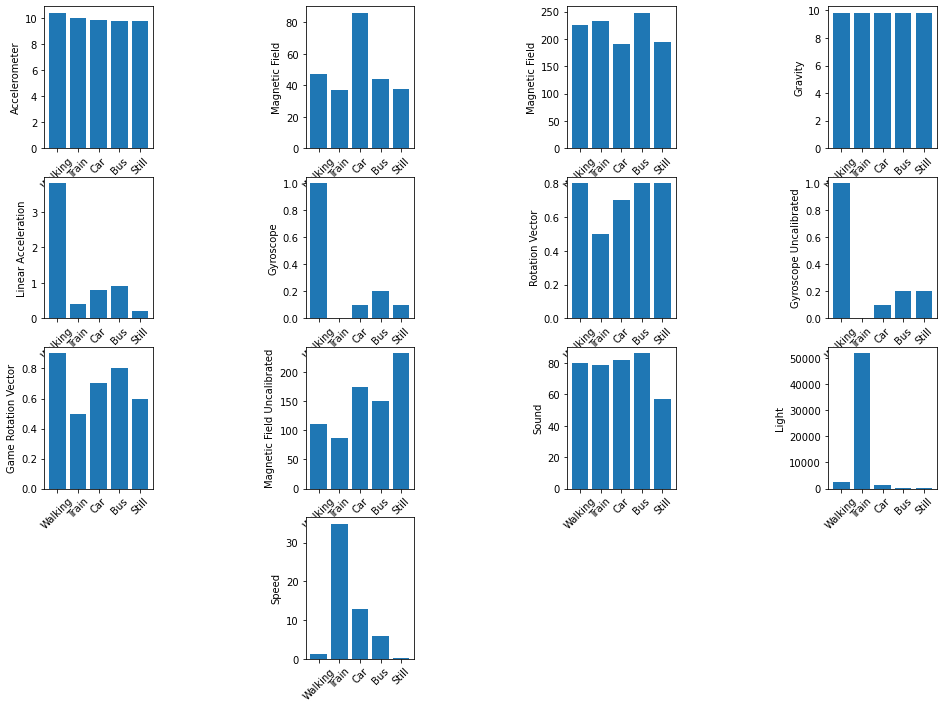

In [310]:
plt.figure(figsize=(16, 12))

plt.subplot(4,7,1)
plt.bar(comparision.index, comparision['Accelerometer'])
plt.ylabel('Accelerometer')
plt.xticks(rotation=45)

plt.subplot(4,7,3)
plt.bar(comparision.index, comparision['Magnetic Field'])
plt.ylabel('Magnetic Field')
plt.xticks(rotation=45)

plt.subplot(4,7,5)
plt.bar(comparision.index, comparision['Orientation'])
plt.ylabel('Magnetic Field')
plt.xticks(rotation=45)

plt.subplot(4,7,7)
plt.bar(comparision.index, comparision['Gravity'])
plt.ylabel('Gravity')
plt.xticks(rotation=45)

plt.subplot(4,7,8)
plt.bar(comparision.index, comparision['Linear Acceleration'])
plt.ylabel('Linear Acceleration')
plt.xticks(rotation=45)

plt.subplot(4,7,10)
plt.bar(comparision.index, comparision['Gyroscope'])
plt.ylabel('Gyroscope')
plt.xticks(rotation=45)

plt.subplot(4,7,12)
plt.bar(comparision.index, comparision['Rotation Vector'])
plt.ylabel('Rotation Vector')
plt.xticks(rotation=45)

plt.subplot(4,7,14)
plt.bar(comparision.index, comparision['Gyroscope Uncalibrated'])
plt.ylabel('Gyroscope Uncalibrated')
plt.xticks(rotation=45)

plt.subplot(4,7,15)
plt.bar(comparision.index, comparision['Game Rotation Vector' ])
plt.ylabel('Game Rotation Vector')
plt.xticks(rotation=45)

plt.subplot(4,7,17)
plt.bar(comparision.index, comparision['Magnetic Field Uncalibrated'])
plt.ylabel('Magnetic Field Uncalibrated')
plt.xticks(rotation=45)

plt.subplot(4,7,19)
plt.bar(comparision.index, comparision['Sound'])
plt.ylabel('Sound')
plt.xticks(rotation=45)

plt.subplot(4,7,21)
plt.bar(comparision.index, comparision['Light'])
plt.ylabel('Light')
plt.xticks(rotation=45)

plt.subplot(4,7,24)
plt.bar(comparision.index, comparision['Speed'])
plt.ylabel('Speed')
plt.xticks(rotation=45)



In [204]:
# df_train.columns.unique

In [312]:
miss_data = pd.read_csv('missing_values.csv', index_col=[0])

miss_data['% missing'] = round(  (( miss_data['Total Users'] -  miss_data['Differences'] ) / miss_data['Total Users']) * 100,  1)

fig = miss_data.sort_values('Missing Values', ascending=True)

#  miss_data.groupby(miss_data['Missing Values'])
fig.shape
fig.head(3)

,Total Users,Missing Values,Differences,% missing
Sensor,,,,
Recognition,62585,0,62585,0.0
User,62585,0,62585,0.0
Accelerometer,62585,0,62585,0.0


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

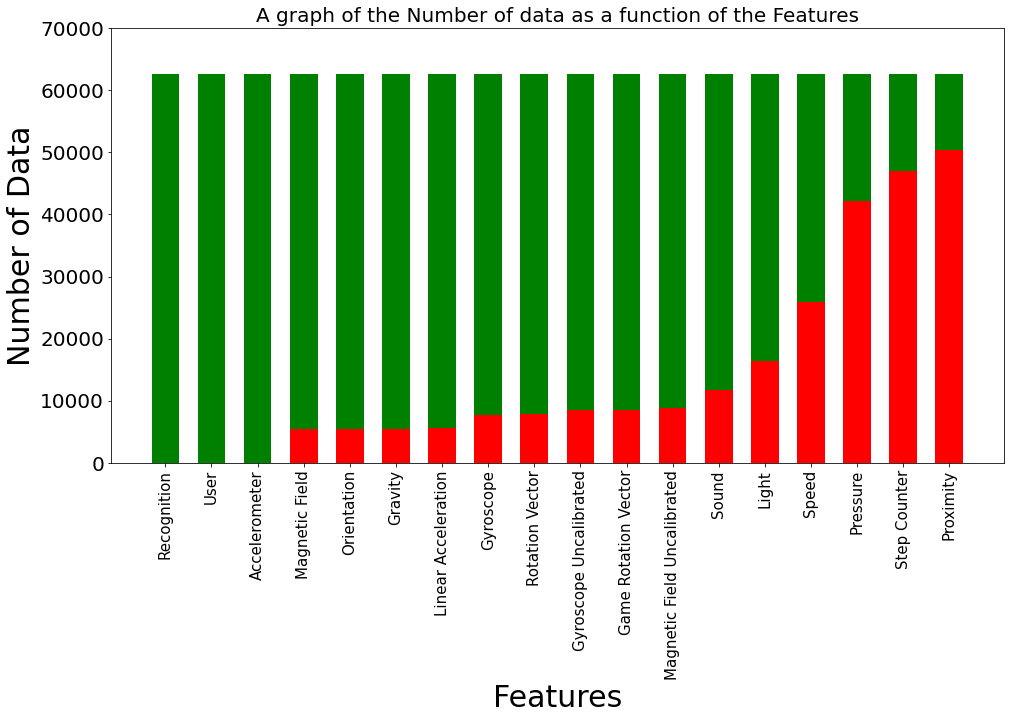

In [104]:
plt.figure(figsize=(16, 8))
# ax = fig.add_axes([0,0,1,1])

X = np.arange(18)
#X = np.arange(len(df_excel['Three Features']))  # Find the 

# plt.bar(X + 0.0, fig['Total Users'], color = 'b', width = 0.2)
# plt.bar(X + 0.2, fig['Missing Values'], color = 'g', width = 0.2)
# plt.bar(X + 0.4, fig['Differences'], color = 'r', width = 0.2)


plt.bar(X, fig['Differences'],     width=0.6, bottom=fig['Missing Values'], color='g')
plt.bar(X, fig['Missing Values'],  width=0.6,                        color='r')

plt.ylabel('Number of Data', fontsize=30)
plt.xlabel('Features', fontsize=30)
plt.title('A graph of the Number of data as a function of the Features', fontsize=20)
plt.ylim(0, 70000)
plt.xticks(X, fig.index, rotation=90, fontsize=15 )
# plt.text(X, fig['% missing'], fig['% missing'] )

plt.yticks(fontsize=20)
# plt.legend(labels=['Three Features', 'Eight Features', 'Nine Features'], fontsize=16)
# plt.text(X, fig['% missing'], fig['% missing'] )

In [322]:
columns_three_features        = ['android.sensor.gyroscope#mean', 'speed#mean', 'android.sensor.magnetic_field#mean']
columns_four_features      = ['android.sensor.gyroscope#mean', 'speed#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.rotation_vector#mean']
columns_thirteen_features  =['android.sensor.accelerometer#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean', 'android.sensor.gravity#mean', 'android.sensor.linear_acceleration#mean', 'android.sensor.gyroscope#mean', 'android.sensor.rotation_vector#mean', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.game_rotation_vector#mean', 'android.sensor.magnetic_field_uncalibrated#mean', 'sound#mean', 'android.sensor.light#mean', 'speed#mean' ]

target = 'target'


,Unnamed: 0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.game_rotation_vector#mean,android.sensor.gravity#mean,android.sensor.gyroscope#mean,android.sensor.gyroscope_uncalibrated#mean,android.sensor.linear_acceleration#mean,android.sensor.magnetic_field#mean,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.orientation#mean,android.sensor.rotation_vector#mean,sound#mean,speed#mean,user,target
0,5355,100.0,9.503041,0.808288,9.806651,0.056170,0.074991,0.268178,29.522159,152.922977,312.034733,0.925456,100.0,8.0,1,Bus
1,60234,100.0,5.341914,0.693870,9.806650,2.098850,1.417308,6.519720,34.267394,103.377094,91.785124,0.661965,100.0,1.5,1,Walking
2,59781,100.0,10.232711,0.775908,9.806650,1.653144,0.319756,5.723122,62.838451,160.361432,201.554463,0.931355,100.0,1.5,1,Walking


In [3]:
cleaned_data = pd.read_csv('40k_rows.csv')

columns_3_features = ['android.sensor.gyroscope#mean', 'speed#mean', 'android.sensor.magnetic_field#mean']
target = 'target'

X_3 = cleaned_data[columns_3_features]
y  = cleaned_data[target]

from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, random_state=0, stratify=y)

model_decision_tree_3 = DecisionTreeClassifier()
model_random_forest_3 = RandomForestClassifier()
model_SVC_3           = SVC()

model_decision_tree_3.fit(X_train_3, y_train_3)
model_random_forest_3.fit(X_train_3, y_train_3)
model_SVC_3.fit(X_train_3, y_train_3)

accuracy_decision_tree_3 = round(model_decision_tree_3.score(X_test_3, y_test_3) * 100, 1)
accuracy_random_forest_3 = round(model_random_forest_3.score(X_test_3, y_test_3) * 100, 1)
accuracy_SVC_3           = round(model_SVC_3.score(X_test_3, y_test_3) * 100, 1)

print(accuracy_decision_tree_3)
print(accuracy_random_forest_3)
print(accuracy_SVC_3)

95.7
95.7
67.1


In [ ]:
# accuracy_decision_tree_3 = round(model_decision_tree_3.score(X_train_3, y_train_3) * 100, 1)
# accuracy_random_forest_3 = round(model_random_forest_3.score(X_train_3, y_train_3) * 100, 1)
# accuracy_SVC_3           = round(model_SVC_3.score(X_train_3, y_train_3) * 100, 1)

# print(accuracy_decision_tree_3)
# print(accuracy_random_forest_3)
# print(accuracy_SVC_3)

95.8
95.7
67.1


In [2]:


cleaned_data = pd.read_csv('40k_rows.csv')

columns_4_features = ['android.sensor.gyroscope#mean', 'speed#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.rotation_vector#mean']
target = 'target'

X_4 = cleaned_data[columns_4_features]
y  = cleaned_data[target]

from sklearn.model_selection import train_test_split

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, random_state=0, stratify=y)

model_decision_tree_4 = DecisionTreeClassifier()
model_random_forest_4 = RandomForestClassifier()
model_SVC_4           = SVC()

model_decision_tree_4.fit(X_train_4, y_train_4)
model_random_forest_4.fit(X_train_4, y_train_4)
model_SVC_4.fit(X_train_4, y_train_4)

accuracy_decision_tree_4 = round(model_decision_tree_4.score(X_test_4, y_test_4) * 100, 1)
accuracy_random_forest_4 = round(model_random_forest_4.score(X_test_4, y_test_4) * 100, 1)
accuracy_SVC_4           = round(model_SVC_4.score(X_test_4, y_test_4) * 100, 1)

print(accuracy_decision_tree_4)
print(accuracy_random_forest_4)
print(accuracy_SVC_4)

97.2
98.7
67.1


In [4]:
columns_12_features  =['android.sensor.accelerometer#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean', 'android.sensor.gravity#mean', 'android.sensor.linear_acceleration#mean', 'android.sensor.gyroscope#mean', 'android.sensor.rotation_vector#mean', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.game_rotation_vector#mean', 'android.sensor.magnetic_field_uncalibrated#mean', 'sound#mean',  'speed#mean' ]


cleaned_data = pd.read_csv('40k_rows.csv')

columns_12_features  =['android.sensor.accelerometer#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean', 'android.sensor.gravity#mean', 'android.sensor.linear_acceleration#mean', 'android.sensor.gyroscope#mean', 'android.sensor.rotation_vector#mean', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.game_rotation_vector#mean', 'android.sensor.magnetic_field_uncalibrated#mean', 'sound#mean',  'speed#mean' ]

target = 'target'

X_12 = cleaned_data[columns_12_features]
y  = cleaned_data[target]

from sklearn.model_selection import train_test_split

X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y, random_state=0, stratify=y)

model_decision_tree_12 = DecisionTreeClassifier()
model_random_forest_12 = RandomForestClassifier()
model_SVC_12           = SVC()

model_decision_tree_12.fit(X_train_12, y_train_12)
model_random_forest_12.fit(X_train_12, y_train_12)
model_SVC_12.fit(X_train_12, y_train_12)

accuracy_decision_tree_12 = round(model_decision_tree_12.score(X_test_12, y_test_12) * 100, 1)
accuracy_random_forest_12 = round(model_random_forest_12.score(X_test_12, y_test_12) * 100, 1)
accuracy_SVC_12           = round(model_SVC_12.score(X_test_12, y_test_12) * 100, 1)

print(accuracy_decision_tree_12)
print(accuracy_random_forest_12)
print(accuracy_SVC_12)

99.1
99.7
88.2


# FUNCTION TO FIND THE ACCURACY

In [7]:


def accuracy(name_file, columns_of_features):

     cleaned_data = pd.read_csv(name_file)

     features  = columns_of_features
     target    = 'target'

     X = cleaned_data[features]
     y = cleaned_data[target]

     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

     model_decision_tree = DecisionTreeClassifier()
     model_random_forest = RandomForestClassifier()
     model_SVC           = SVC()

     model_decision_tree.fit(X_train, y_train)
     model_random_forest.fit(X_train, y_train)
     model_SVC.fit(X_train, y_train)

     accuracy_decision_tree = round(model_decision_tree.score(X_test, y_test) * 100, 1)
     accuracy_random_forest = round(model_random_forest.score(X_test, y_test) * 100, 1)
     accuracy_SVC           = round(model_SVC.score(X_test, y_test) * 100, 1)

     print('Decision Tree Accuracy : ', accuracy_decision_tree)
     print('Random Forest Accuracy : ', accuracy_random_forest)
     print('SVC Accuracy           : ', accuracy_SVC)

     return accuracy_decision_tree, accuracy_random_forest, accuracy_SVC



# TWO FEATURES

In [18]:
""" Magnetic Field and Gyroscope"""



columns_features  = ['android.sensor.magnetic_field#mean', 'android.sensor.gyroscope#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)



Decision Tree Accuracy :  72.8
Random Forest Accuracy :  77.5
SVC Accuracy           :  40.0


(72.8, 77.5, 40.0)

In [19]:
""" Magnetic Field and Speed """

columns_features  =['android.sensor.magnetic_field#mean',   'speed#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)


Decision Tree Accuracy :  95.8
Random Forest Accuracy :  95.8
SVC Accuracy           :  66.2


(95.8, 95.8, 66.2)

In [20]:
""" Magnetic Field and Game Rotation Vector """

columns_features  =['android.sensor.magnetic_field#mean',  'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  80.8
Random Forest Accuracy :  84.4
SVC Accuracy           :  34.8


(80.8, 84.4, 34.8)

In [21]:
""" Gyroscope and Speed """

columns_features  =[ 'android.sensor.gyroscope#mean',  'speed#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  93.1
Random Forest Accuracy :  92.0
SVC Accuracy           :  80.8


(93.1, 92.0, 80.8)

In [22]:
""" Gyroscope and Game Rotation Vector """

columns_features  =[ 'android.sensor.gyroscope#mean',  'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  69.9
Random Forest Accuracy :  75.0
SVC Accuracy           :  59.3


(69.9, 75.0, 59.3)

In [23]:
""" Speed and Game Rotation Vector """

columns_features  =[  'speed#mean', 'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)


Decision Tree Accuracy :  96.0
Random Forest Accuracy :  95.7
SVC Accuracy           :  75.9


(96.0, 95.7, 75.9)

# THREE FEATURES

In [24]:
""" Magnetic Field,   Gyroscope,  and Speed """


columns_features  =['android.sensor.magnetic_field#mean', 'android.sensor.gyroscope#mean',  'speed#mean']
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)


Decision Tree Accuracy :  95.7
Random Forest Accuracy :  95.8
SVC Accuracy           :  67.1


(95.7, 95.8, 67.1)

In [25]:
""" Magnetic Field,   Gyroscope,  and Game Rotation Vector """

columns_features  =['android.sensor.magnetic_field#mean', 'android.sensor.gyroscope#mean',   'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  84.8
Random Forest Accuracy :  89.0
SVC Accuracy           :  39.8


(84.8, 89.0, 39.8)

In [26]:
""" Magnetic Field,   Speed,  and Game Rotation Vector """

columns_features  =['android.sensor.magnetic_field#mean',   'speed#mean', 'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  97.8
Random Forest Accuracy :  98.3
SVC Accuracy           :  66.2


(97.8, 98.3, 66.2)

In [27]:
""" Gyroscope,   Speed,  and Game Rotation Vector """

columns_features  =[ 'android.sensor.gyroscope#mean',  'speed#mean', 'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  95.8
Random Forest Accuracy :  95.7
SVC Accuracy           :  81.1


(95.8, 95.7, 81.1)

# FOUR FEATURES

In [28]:
columns_features  =['android.sensor.magnetic_field#mean', 'android.sensor.gyroscope#mean',  'speed#mean', 'android.sensor.game_rotation_vector#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  97.7
Random Forest Accuracy :  98.6
SVC Accuracy           :  67.5


(97.7, 98.6, 67.5)

# TWELVE FEATURES

In [29]:
columns_features  =['android.sensor.accelerometer#mean', 'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean', 'android.sensor.gravity#mean', 'android.sensor.linear_acceleration#mean', 'android.sensor.gyroscope#mean', 'android.sensor.rotation_vector#mean', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.game_rotation_vector#mean', 'android.sensor.magnetic_field_uncalibrated#mean', 'sound#mean',  'speed#mean' ]
name_file = '40k_rows.csv'

accuracy(name_file, columns_features)

Decision Tree Accuracy :  99.1
Random Forest Accuracy :  99.7
SVC Accuracy           :  88.2


(99.1, 99.7, 88.2)